<a href="https://colab.research.google.com/github/Lee-Gunju/AI-paper-code-review-for-personal-project/blob/master/Convolutional_Autoencoder_For_Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [ ]:
def preprocess(array):
  array = array.astype('float32') / 255.0
  array = np.reshape(array, (len(array), 28, 28, 1))
  return array


def noise(array):
  noise_factor = 0.4
  noisy_array = array + noise_factor * np.random.normal(loc=0.0, scale = 1.0, size = array.shape)
  return np.clip(noisy_array, 0.0, 1.0)

def display(array1, array2):
  n = 10

  indices = np.random.randint(len(array1), size = n)
  images1 = array1[indices, :]
  images2 = array2[indices, :]

  plt.figure(figsize=(20,4))

  for i, (image1, image2) in enumerate(zip(images1, images2)):
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(image1.reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(image2.reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()


In [ ]:
(train_data, _), (test_data, _) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [ ]:
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

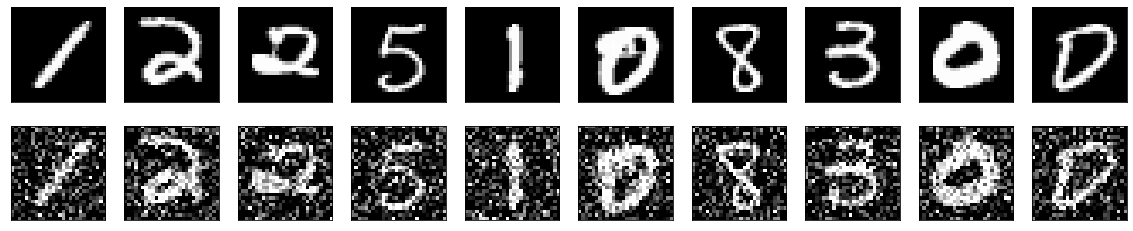

In [ ]:
display(train_data, noisy_train_data)


In [ ]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        9248  

In [ ]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 37s 9ms/step - loss: 0.2544 - val_loss: 0.0731
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0727 - val_loss: 0.0696
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0696 - val_loss: 0.0681
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0685 - val_loss: 0.0672
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0676 - val_loss: 0.0665
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0667 - val_loss: 0.0660
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0662 - val_loss: 0.0655
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0658 - val_loss: 0.0652
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0655 - val_loss: 0.0649
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0652 - val_loss: 0.064

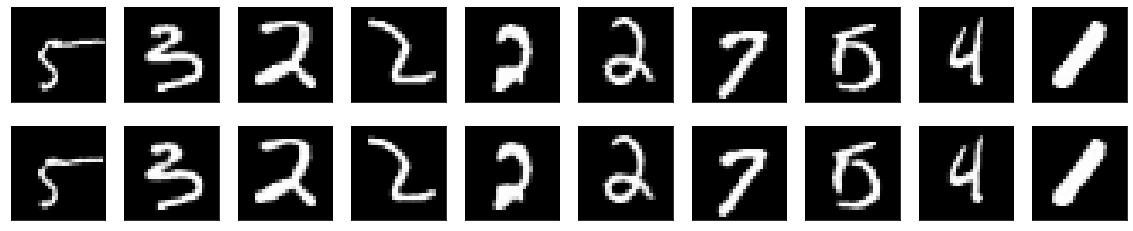

In [ ]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1007 - val_loss: 0.0935
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0932 - val_loss: 0.0916
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0916 - val_loss: 0.0904
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0907 - val_loss: 0.0897
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0899 - val_loss: 0.0890
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0893 - val_loss: 0.0885
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0889 - val_loss: 0.0880
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0885 - val_loss: 0.0881
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0882 - val_loss: 0.0874
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0878 - val_lo

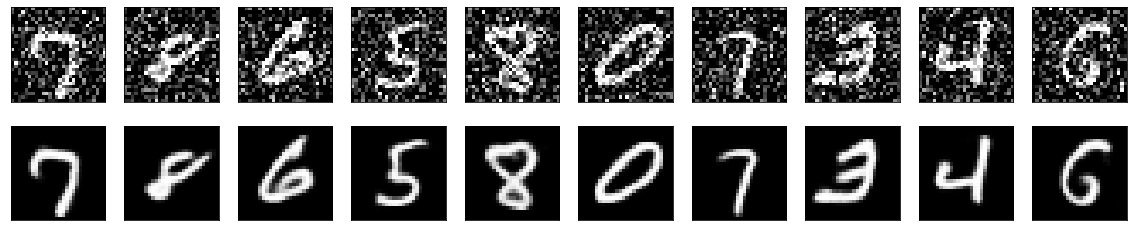

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

In [ ]:
from keras import backend as K

get_layer = K.function([autoencoder.layers[0].input], [autoencoder.layers[-1].output])
layer_output = get_layer([test_data[0]])

In [ ]:
np.shape(layer_output[0])

(10000, 28, 28, 1)

In [ ]:
layer_output[0]

array([[[[1.09010474e-10],
         [3.27179723e-14],
         [2.30800437e-16],
         [3.90713767e-10]],

        [[1.43866669e-10],
         [1.44154653e-12],
         [1.13379161e-13],
         [5.51310375e-09]],

        [[3.57383671e-11],
         [4.88349335e-12],
         [7.97612505e-14],
         [5.82399198e-11]],

        ...,

        [[1.17456889e-09],
         [3.13277084e-08],
         [3.19448490e-09],
         [2.02723811e-08]],

        [[1.48560664e-10],
         [1.61966813e-08],
         [4.86584870e-11],
         [2.31038105e-10]],

        [[1.18884316e-06],
         [3.23410660e-07],
         [7.17355242e-09],
         [7.40249675e-08]]],


       [[[1.09010474e-10],
         [3.27179723e-14],
         [2.30800437e-16],
         [3.90713767e-10]],

        [[1.43866669e-10],
         [1.44154653e-12],
         [1.13379161e-13],
         [5.51310375e-09]],

        [[3.57383671e-11],
         [4.88349335e-12],
         [7.97612505e-14],
         [5.82399198e-1